In [78]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline
from random import randint, choice, choices

# **Data Preprocessing**

In [4]:
df = pd.read_csv("Berlin_crimes.csv")
df

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2019,Reinickendorf,123012,Nord 2 - Waidmannslust/Wittenau/Lübars,34,19,372,85,123,1160,30,135,150,93,16,3,306,74,110,728
1196,2019,Reinickendorf,123021,MV 1 - Märkisches Viertel,42,22,491,123,187,1100,51,224,76,40,39,19,286,11,73,986
1197,2019,Reinickendorf,123022,MV 2 - Rollbergsiedlung,6,4,84,19,34,293,13,36,18,34,5,2,156,56,21,212
1198,2019,Reinickendorf,123043,West 3 - Borsigwalde/Freie Scholle,8,4,95,18,43,492,21,96,69,38,6,1,79,8,31,218


In [5]:
df.isnull().sum()

Year              0
District          0
Code              0
Location          0
Robbery           0
Street_robbery    0
Injury            0
Agg_assault       0
Threat            0
Theft             0
Car               0
From_car          0
Bike              0
Burglary          0
Fire              0
Arson             0
Damage            0
Graffiti          0
Drugs             0
Local             0
dtype: int64

In [6]:
df.isna().sum()

Year              0
District          0
Code              0
Location          0
Robbery           0
Street_robbery    0
Injury            0
Agg_assault       0
Threat            0
Theft             0
Car               0
From_car          0
Bike              0
Burglary          0
Fire              0
Arson             0
Damage            0
Graffiti          0
Drugs             0
Local             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop("Local", axis=1,inplace=True)

# **Top 10 Most Dangerous Districts in Berlin**

In [9]:
danger_df = df.drop(["Code", "Year", "Location"], axis=1)
danger_df

,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs
0,Mitte,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171
1,Mitte,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98
2,Mitte,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435
3,Mitte,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213
4,Mitte,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Reinickendorf,34,19,372,85,123,1160,30,135,150,93,16,3,306,74,110
1196,Reinickendorf,42,22,491,123,187,1100,51,224,76,40,39,19,286,11,73
1197,Reinickendorf,6,4,84,19,34,293,13,36,18,34,5,2,156,56,21
1198,Reinickendorf,8,4,95,18,43,492,21,96,69,38,6,1,79,8,31


In [11]:
bar_df = pd.DataFrame(danger_df.groupby("District").sum().sum(axis=1)).sort_values(by=0, ascending=False)
bar_df

,0
District,
Mitte,601241
Friedrichshain-Kreuzberg,433542
Charlottenburg-Wilmersdorf,388774
Pankow,329098
Neukölln,329049
Tempelhof-Schöneberg,301400
Reinickendorf,211260
Lichtenberg,208003
Steglitz-Zehlendorf,205866


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Mitte'),
  Text(1, 0, 'Friedrichshain-Kreuzberg'),
  Text(2, 0, 'Charlottenburg-Wilmersdorf'),
  Text(3, 0, 'Pankow'),
  Text(4, 0, 'Neukölln'),
  Text(5, 0, 'Tempelhof-Schöneberg'),
  Text(6, 0, 'Reinickendorf'),
  Text(7, 0, 'Lichtenberg'),
  Text(8, 0, 'Steglitz-Zehlendorf'),
  Text(9, 0, 'Treptow-Köpenick'),
  Text(10, 0, 'Spandau'),
  Text(11, 0, 'Marzahn-Hellersdorf')])

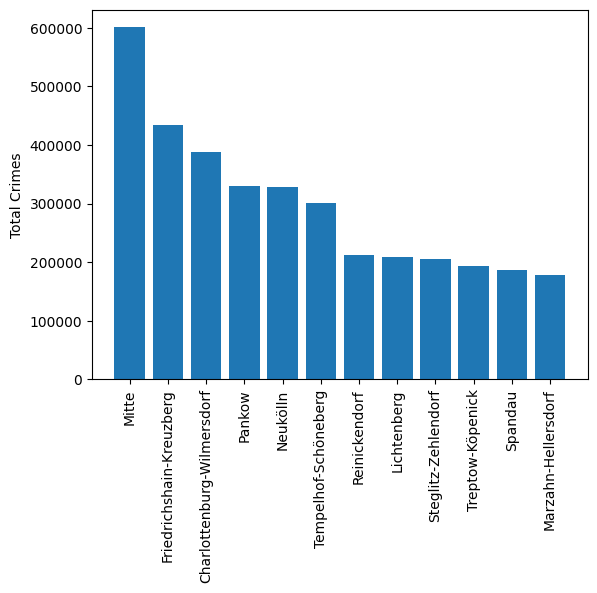

In [12]:
plt.bar(bar_df.index, bar_df[0])
plt.ylabel("Total Crimes")
plt.xticks(rotation=90)

# **Which Crimes Are Growing, Which Crimes Are Decreasing**

In [71]:
crimes_list = np.array(df.columns)
crimes_list

array(['Year', 'District', 'Code', 'Location', 'Robbery',
       'Street_robbery', 'Injury', 'Agg_assault', 'Threat', 'Theft',
       'Car', 'From_car', 'Bike', 'Burglary', 'Fire', 'Arson', 'Damage',
       'Graffiti', 'Drugs'], dtype=object)

In [72]:
crimes_list = np.delete(column_list, [0, 1, 2, 3])

In [149]:
crimes_yearly_df = []
for i in crimes_list:
    crimes_yearly_df.append(df.groupby(by="Year")[i].sum())

In [161]:
crimes_yearly_df = pd.DataFrame(crimes_yearly_df).transpose()
crimes_yearly_df.rename_axis("Crimes", inplace=True)
crimes_yearly_df

Crimes,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs
Crimes,,,,,,,,,,,,
2012,11032,14196,207340,5732,30503,25836,12285,2514,904,48582,11070,11687
2013,10247,14333,220417,6628,35652,26389,11563,2561,972,43176,9573,12746
2014,9515,13733,229955,6629,36032,30434,12149,2322,908,40678,8166,12878
2015,9664,13260,251366,6649,34741,31937,11805,2103,834,39841,8471,15176
2016,10024,13557,251192,7305,34515,34136,11487,2529,1032,41768,9015,14407
2017,10608,13452,220220,6642,32308,30082,8572,2210,872,40985,10428,15503
2018,10656,13965,209957,5671,28677,29978,7568,2334,886,39883,9103,16700
2019,10754,14604,200322,5751,25902,28456,7958,2616,1130,42986,9635,18334


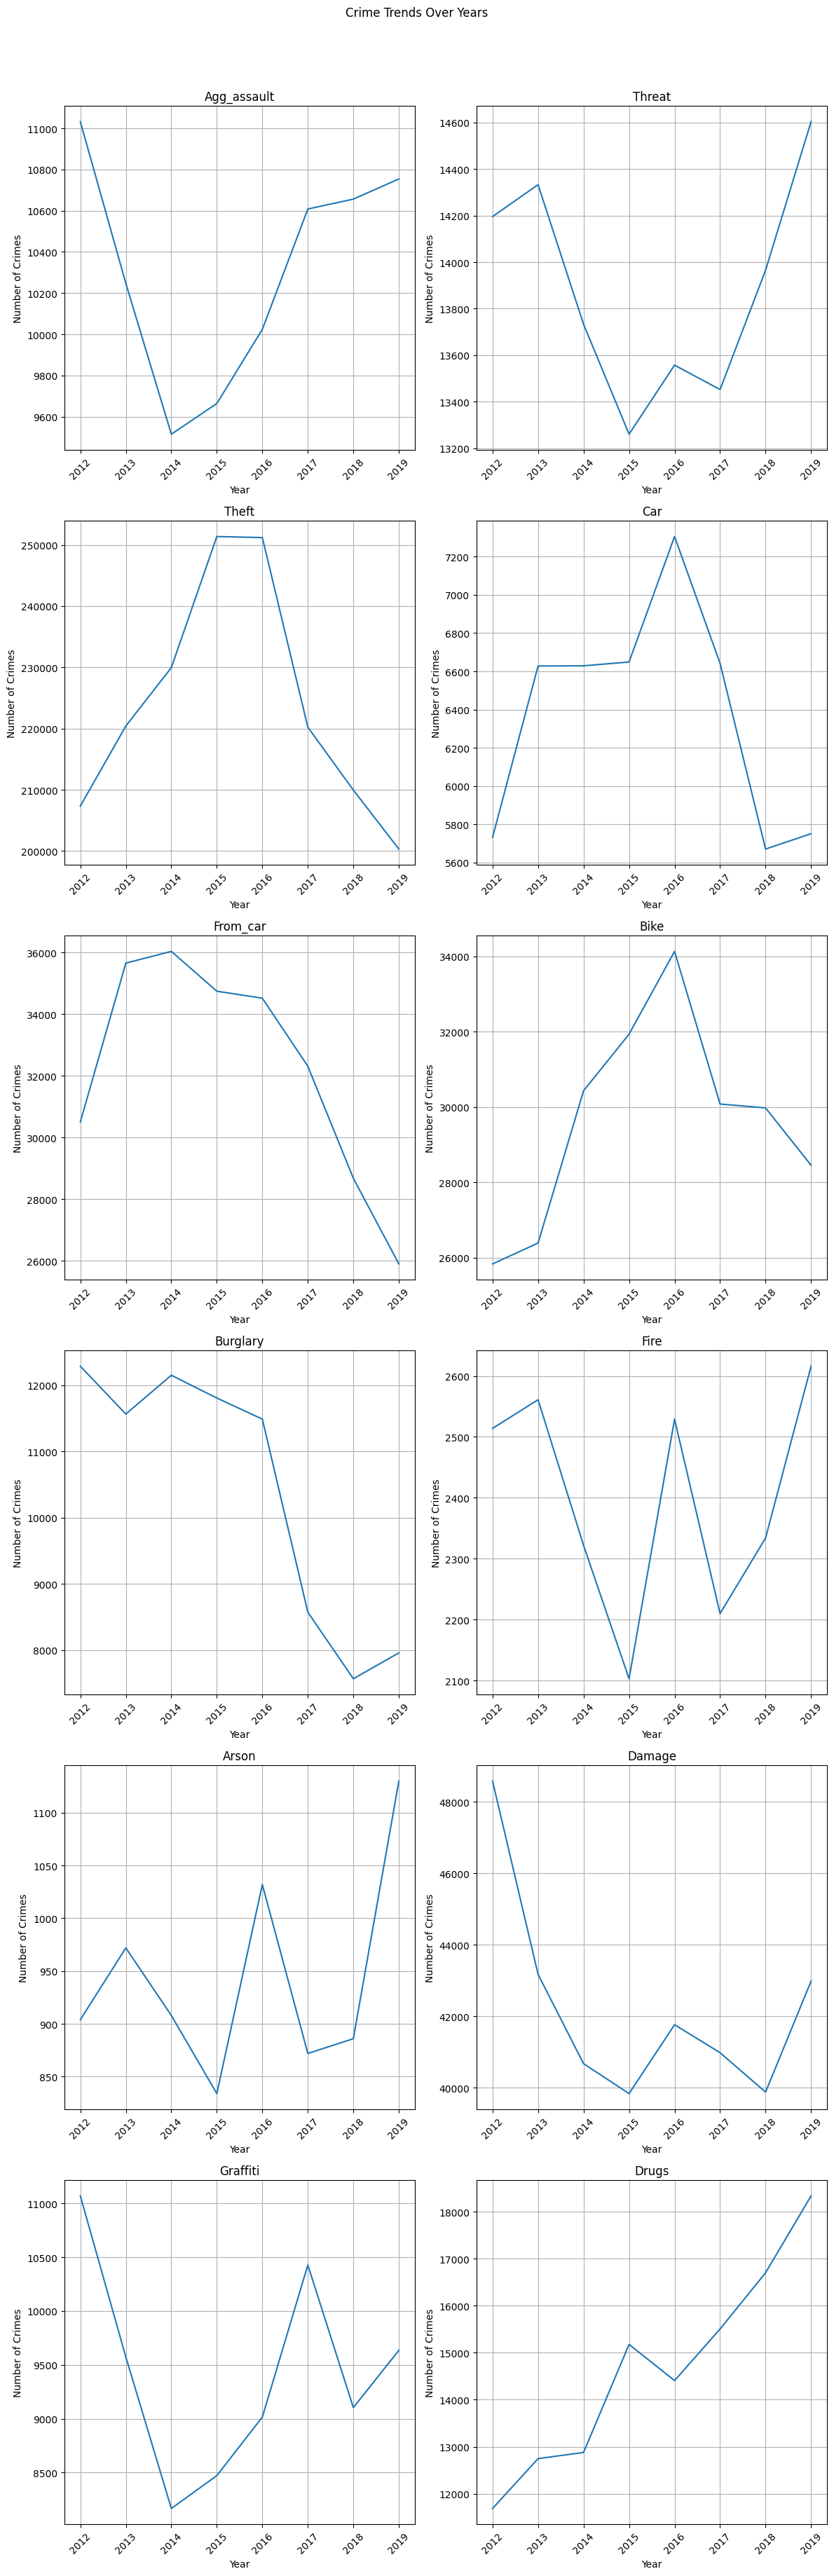

In [174]:
num_plots = len(crimes_list)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
fig.suptitle('Crime Trends Over Years', y=1.02)

for i, crime_type in enumerate(crimes_list):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.plot(crimes_yearly_df.index, crimes_yearly_df[crime_type])
    ax.set_title(crime_type)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Crimes')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()


# Remove any empty subplots
for i in range(num_plots, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.show()